In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

import sys
sys.path.append('..')

from helper import kmeans as km

# load image as `ndarray`
http://scikit-image.org/

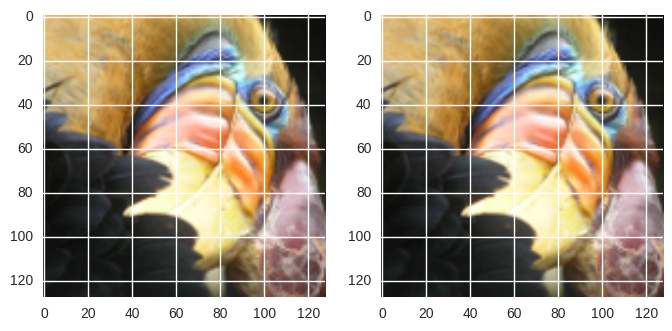

In [2]:
from skimage import io

pic = io.imread('data/bird_small.png') / 255.  # int to float

# just want to make sure reshape didn't mess up the image
fig, ax = plt.subplots(1, 2)
ax[0].imshow(pic)
ax[1].imshow(pic.reshape(128*128, 3).reshape((128,128,3)))

In [3]:
pic.shape

(128, 128, 3)

In [4]:
data = pic.reshape(128*128, 3)

# let's do k-mean

* my version will take more than 10 mins... ok. I know why I shouldn't implement my own ML library.

* In the future I will only implement ML algorithm for the sake of learning it XD

In [5]:
# C, centroids, cost = km.k_means(pd.DataFrame(data), 16, epoch = 10, n_init=3)

# sklearn KMeans

In [6]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=16, n_init=100, n_jobs=-1)

In [7]:
model.fit(data)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=16, n_init=100,
    n_jobs=-1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [8]:
centroids = model.cluster_centers_
print(centroids.shape)

C = model.predict(data)
print(C.shape)

(16, 3)
(16384,)


In [9]:
centroids[C].shape

(16384, 3)

In [10]:
compressed_pic = centroids[C].reshape((128,128,3))

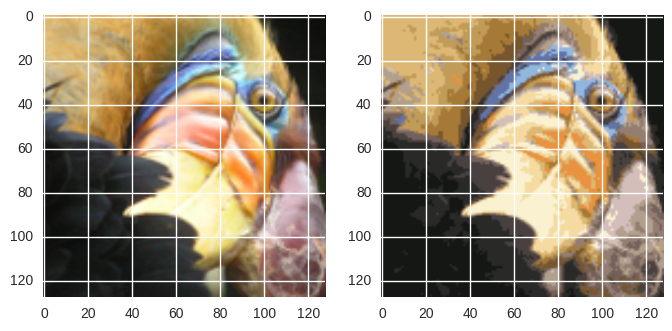

In [11]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(pic)
ax[1].imshow(compressed_pic)

so... before I transform raw data from `int ndarray` to `float`, the RGB color is way off...